<a href="https://colab.research.google.com/github/jae-gyeong/marchine_learning_start/blob/master/19_09_30gradient_boosting_%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 그래디언트 부스팅(Gradient Boosting)
(가) 여러 개의 결정 트리를 묶어 강력한 모델을 만든다.

(나) 분류(Classification)과 회귀(Regression)에 모두 사용 가능.

(다) 랜덤포레스트(random forest)와 달리 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든
다.
* 이전트리의 오차를 얼마나 강하게 보정할 것인가를 제어(learning_rate이다.)

(라) 무작위성이 없으며, 대신 강력한 사전 가지치기(pruning)을 사용

(마) 각각의 트리는 일부에 대해서만 예측을 잘 수행, 트리가 많을수록 성능이 좋아짐

(바) 랜덤 포레스트보다 매개 변수 설정에 더 민감 잘 조정하면 더 높은 정확도를 얻을 수 있음.

(사) 중요한 매개변수 중의 하나는 learning_rate이다. (학습률이 크면 보정을 강하게 한다.)

(아) n_estimators 의 값은 앙상블에 더 많은 트리가 추가되어, 모델의 복잡도는 커지지만 훈련 세트에서의
실수를 보완된다.

(자) 트리의 깊이가 5정도로서 깊지 않은 트리를 사용하여 메모리 사용이 적고 예측도 빠르다.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
# ### 한글
# import matplotlib
# from matplotlib import font_manager, rc
# font_loc = "C:/Windows/Fonts/malgunbd.ttf"
# font_name = font_manager.FontProperties(fname=font_loc).get_name()
# matplotlib.rc('font', family=font_name)


In [0]:
## 중요도 그래프 그리기
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("특성 중요도")
 plt.ylabel("특성")
 plt.ylim(-1, n_features)

# 01. GradientBoostig 알고리즘 실습
depth는 3,

트리 100개(n_estimators)

학습률 : 0.1을 사용

데이터 셋 : load_breast_cancer

classification용 유방암 진단 자료

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


훈련 세트의 정확도가 100%이므로 과대적합(Overfitting)


# 02. 훈련세트에 대한 과적합을 줄이기
max_depth 조절.

learning_rate 조절.

In [0]:
# 1. tree depth의 조절
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [0]:
# 2. learning_rate 조절
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


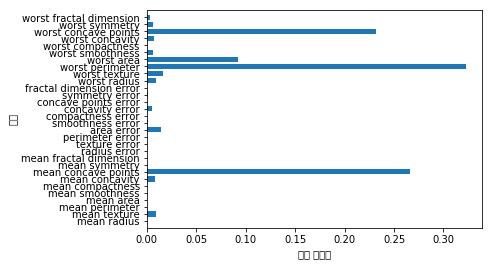

In [0]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

그래디언트 부스팅은 일부 특성을 완전히 무시

비슷한 종류의 데이터에서 보통 더 안정적인 랜덤 포레스트를 먼저 적용해본다.



# 모델의 장단점
단점 :

매개변수를 잘 조정해야 하며, 훈련 시간이 길다.

트리 모델 특성 상 희소한 고차원 데이터에는 잘 동작하지 않는다.

장점 :

feature의 scale(범위, 값)을 조정하지 않아도 이진특성이 연속적인 특성에서 잘 동작
feature 의 스케일을 조정하지 않아도 된다.

# 매개변수
이전트리의 오차를 보정하는 정도 조절 : learning_rate

learning_rate를 낮추면 =>> 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야 한다.

n_estimator가 클수록 좋다.(랜덤포레스트)

n_estimator가 크면 그래디언트 부스팅은 과적합의 가능성이 있음.

훈련 세트 정확도: 0.988

테스트 세트 정확도: 0.965

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))

print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

트리의 복잡도를 낮추는 max_depth (또는 max_leaf_nodes)

보통 부스팅 모델에서 max_depth를 매우작게 설정하며 트리의 깊이가 5보다 깊어지지 않도록 한다.

n_estimators를 맞춘 이후에 learning_rate를 찾는다.
